In [1]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
import pandas as pd

C:\Users\Nishant Balaji\miniforge3\envs\species-id\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Nishant Balaji\miniforge3\envs\species-id\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Nishant Balaji\miniforge3\envs\species-id\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Nishant Balaji\mini

## Running Moment to Moment Labeling System on a Directory of WAV Files 

In [2]:
path = "./TEST/"
#path = "/home/jacob/Desktop/EngineersForExploration/Data/Relevant BirdCLEF info/audio/"

### Dictionary that defines the isolation technique and parameters used to generate automated labels 

In [3]:
isolation_parameters = {
    "technique" : "steinberg",
    "threshold_type" : "median",
    "threshold_const" : 2.0,
    "threshold_min" : 0.0,
    "window_size" : 2.0,
    "chunk_size" : 5.0
}

In [4]:
automated_df = generate_automated_labels(path,isolation_parameters,normalize_local_scores=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Pandas Ouput of Automated Labeling 

In [5]:
automated_df

,FOLDER,IN FILE,CHANNEL,CLIP LENGTH,SAMPLE RATE,OFFSET,DURATION,MANUAL ID
0,./TEST/,ScreamingPiha1.wav,0,32.616000,16000,0.000000,2.086937,bird
1,./TEST/,ScreamingPiha1.wav,0,32.616000,16000,10.316937,2.255750,bird
2,./TEST/,ScreamingPiha1.wav,0,32.616000,16000,20.035438,11.015187,bird
3,./TEST/,ScreamingPiha10.wav,0,89.782857,44100,0.000000,1.092789,bird
4,./TEST/,ScreamingPiha10.wav,0,89.782857,44100,2.456395,2.092789,bird
5,./TEST/,ScreamingPiha10.wav,0,89.782857,44100,4.892109,4.319728,bird
6,./TEST/,ScreamingPiha10.wav,0,89.782857,44100,10.088299,9.376735,bird
7,./TEST/,ScreamingPiha10.wav,0,89.782857,44100,20.828639,9.121565,bird
8,./TEST/,ScreamingPiha10.wav,0,89.782857,44100,30.130748,8.448844,bird
9,./TEST/,ScreamingPiha10.wav,0,89.782857,44100,39.688027,10.861361,bird


### Function that gathers statistics about the duration of labels 

In [6]:
annotation_duration_statistics(automated_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,49,2.09,10.352083,11.467032,1.092789,2.563605,8.216871,10.861361,55.420816


### Human Manual Labels for Comparison 

In [7]:
manual_df = pd.read_csv("ScreamingPiha_Manual_Labels.csv")
#manual_df = pd.read_csv("BirdCLEF2020_Validation.csv")
manual_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLING RATE,MANUAL ID
0,./TEST/,ScreamingPiha1.wav,32.6160,0,1.5448,2.1297,16000,bird
1,./TEST/,ScreamingPiha1.wav,32.6160,0,10.1638,0.8498,16000,bird
2,./TEST/,ScreamingPiha1.wav,32.6160,0,0.5549,0.9999,16000,bird
3,./TEST/,ScreamingPiha1.wav,32.6160,0,8.7739,0.8399,16000,bird
4,./TEST/,ScreamingPiha1.wav,32.6160,0,12.6335,1.9997,16000,bird
...,...,...,...,...,...,...,...,...
249,./TEST/,ScreamingPiha2.wav,33.9331,0,26.9274,1.7602,44100,bird
250,./TEST/,ScreamingPiha2.wav,33.9331,0,30.8178,0.7200,44100,bird
251,./TEST/,ScreamingPiha2.wav,33.9331,0,29.8677,0.9401,44100,bird
252,./TEST/,ScreamingPiha2.wav,33.9331,0,31.5378,1.9502,44100,bird


In [8]:
annotation_duration_statistics(manual_df)

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,254,1.87,1.068224,0.664488,0.11,0.532475,0.78005,1.767475,3.1199


### Function that plots the duration of the labels in a histogram 

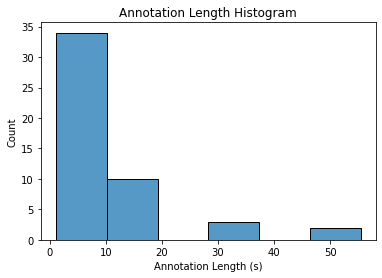

In [ ]:
annotation_duration_histogram(automated_df)

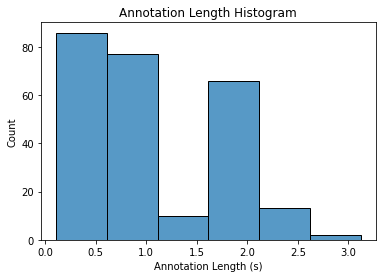

In [10]:
annotation_duration_histogram(manual_df)

### Helper function to convert to kaleidoscope-compatible format 

In [11]:
kaleidoscope_conversion(manual_df)

,FOLDER,IN FILE,CHANNEL,OFFSET,DURATION,MANUAL ID
0,./TEST/,ScreamingPiha1.wav,0,1.5448,2.1297,bird
1,./TEST/,ScreamingPiha1.wav,0,10.1638,0.8498,bird
2,./TEST/,ScreamingPiha1.wav,0,0.5549,0.9999,bird
3,./TEST/,ScreamingPiha1.wav,0,8.7739,0.8399,bird
4,./TEST/,ScreamingPiha1.wav,0,12.6335,1.9997,bird
...,...,...,...,...,...,...
249,./TEST/,ScreamingPiha2.wav,0,26.9274,1.7602,bird
250,./TEST/,ScreamingPiha2.wav,0,30.8178,0.7200,bird
251,./TEST/,ScreamingPiha2.wav,0,29.8677,0.9401,bird
252,./TEST/,ScreamingPiha2.wav,0,31.5378,1.9502,bird


## Different Combinations of Local Score Visualization Graphs

### Baseline Graph without any annotations

No handles with labels found to put in legend.


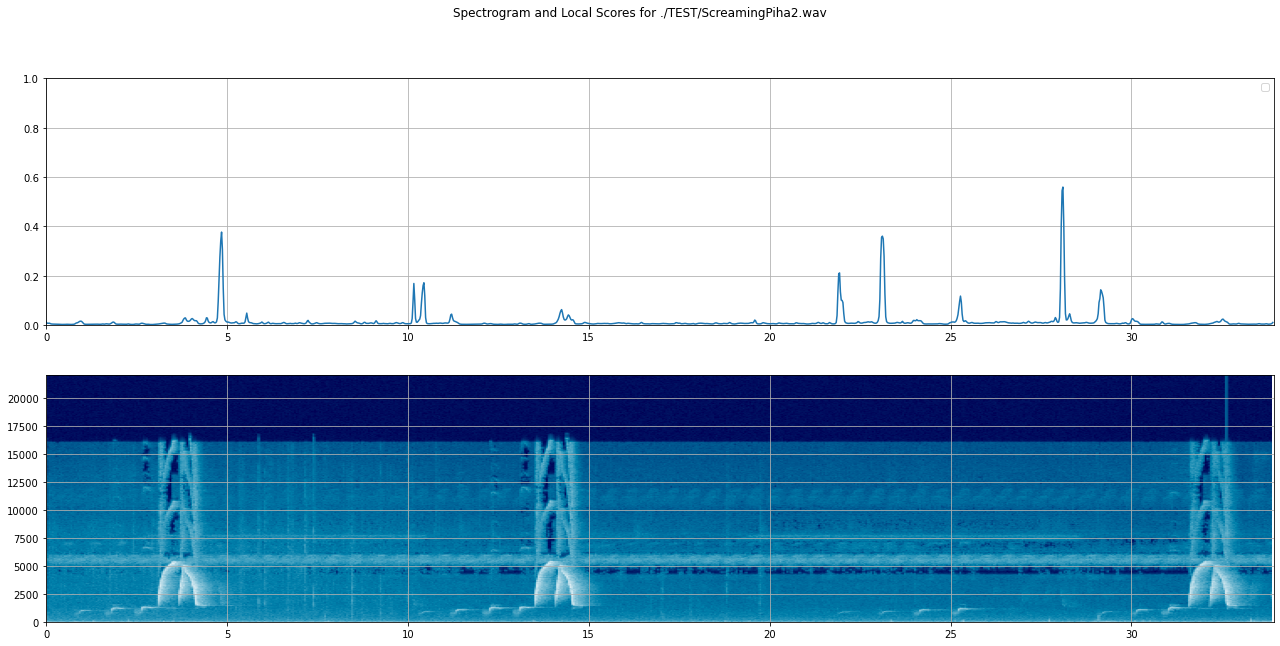

In [12]:
clip_path = "./TEST/ScreamingPiha2.wav"
local_score_visualization(clip_path)

### Baseline graph with log scale

No handles with labels found to put in legend.


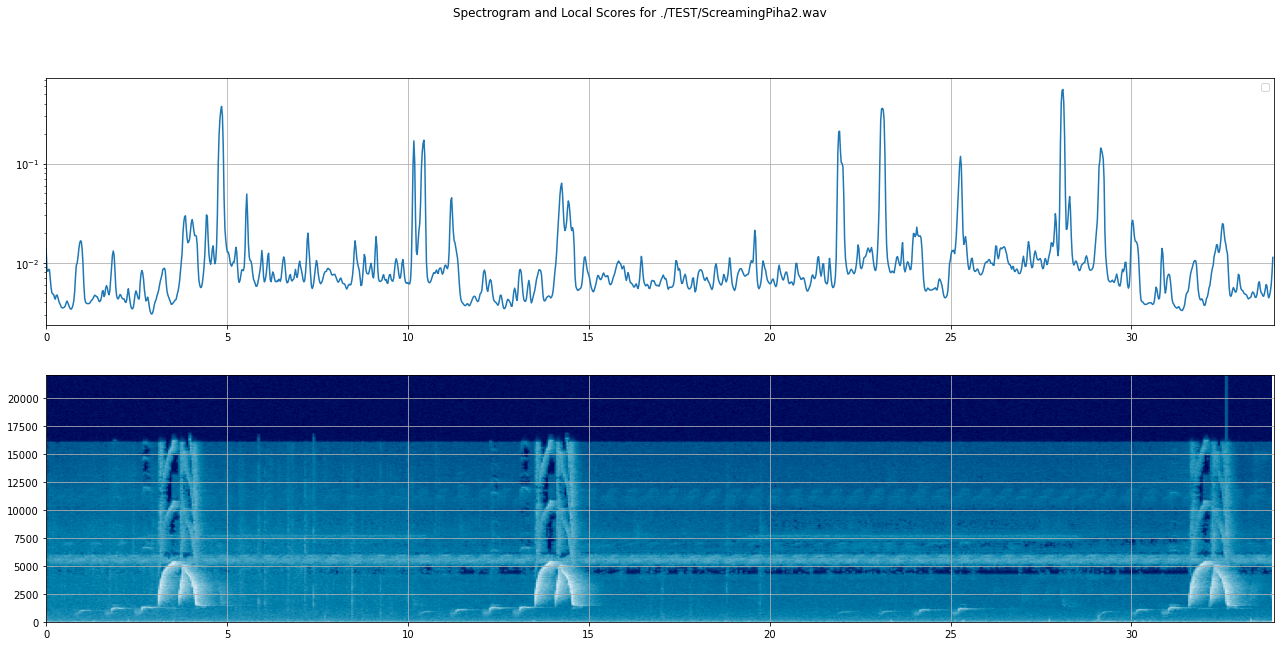

In [13]:
local_score_visualization(clip_path,log_scale = True)

### Baseline graph with normalized local score values between [0,1] 

No handles with labels found to put in legend.


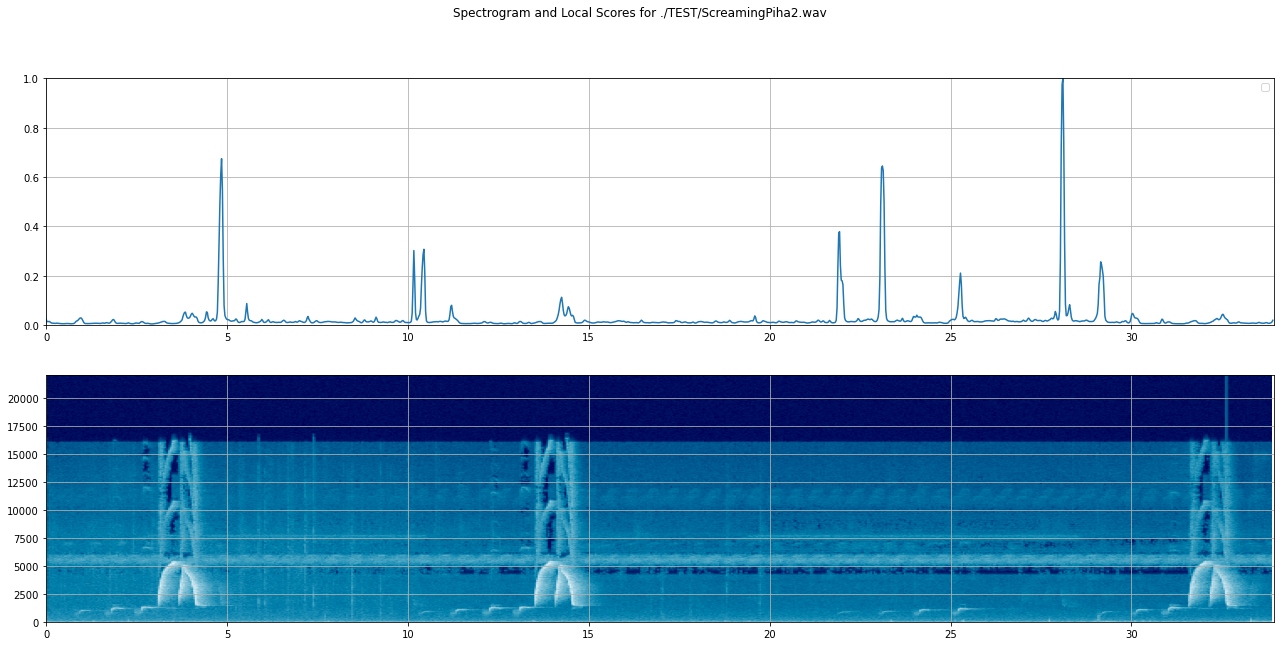

In [14]:
local_score_visualization(clip_path, normalize_local_scores = True)

### Graph with Automated Labeling 

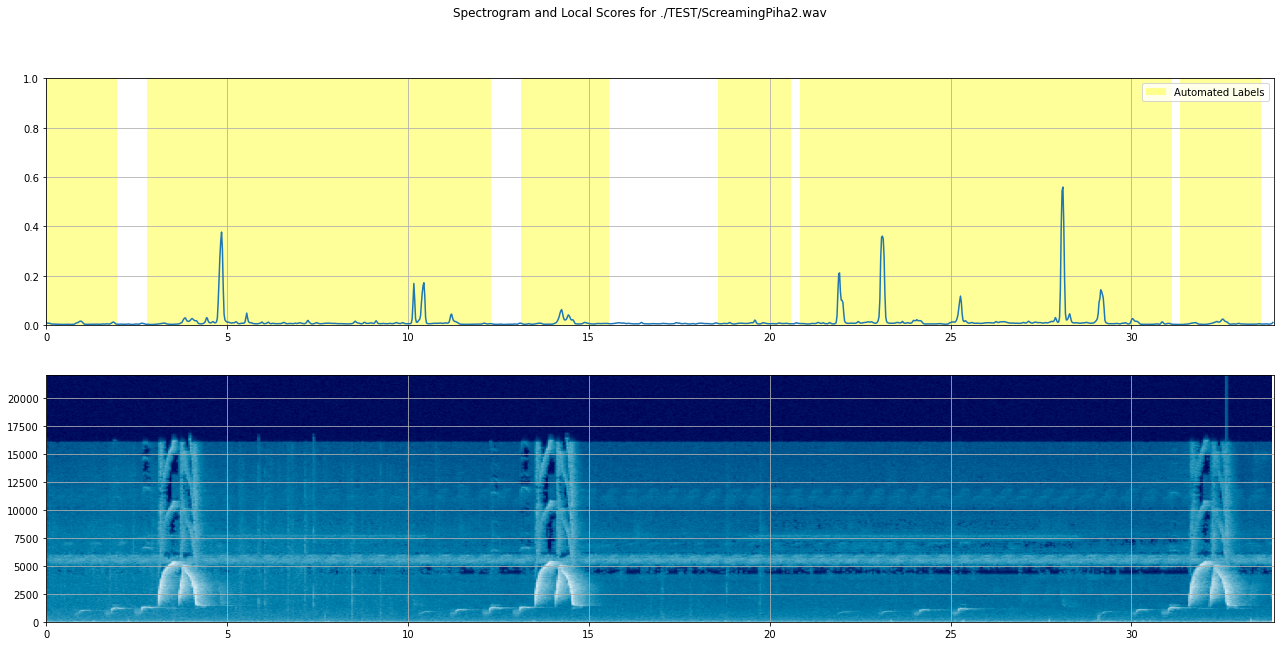

In [15]:
local_score_visualization(clip_path,automated_df = True, isolation_parameters = isolation_parameters)

### Graph with Human Labelling

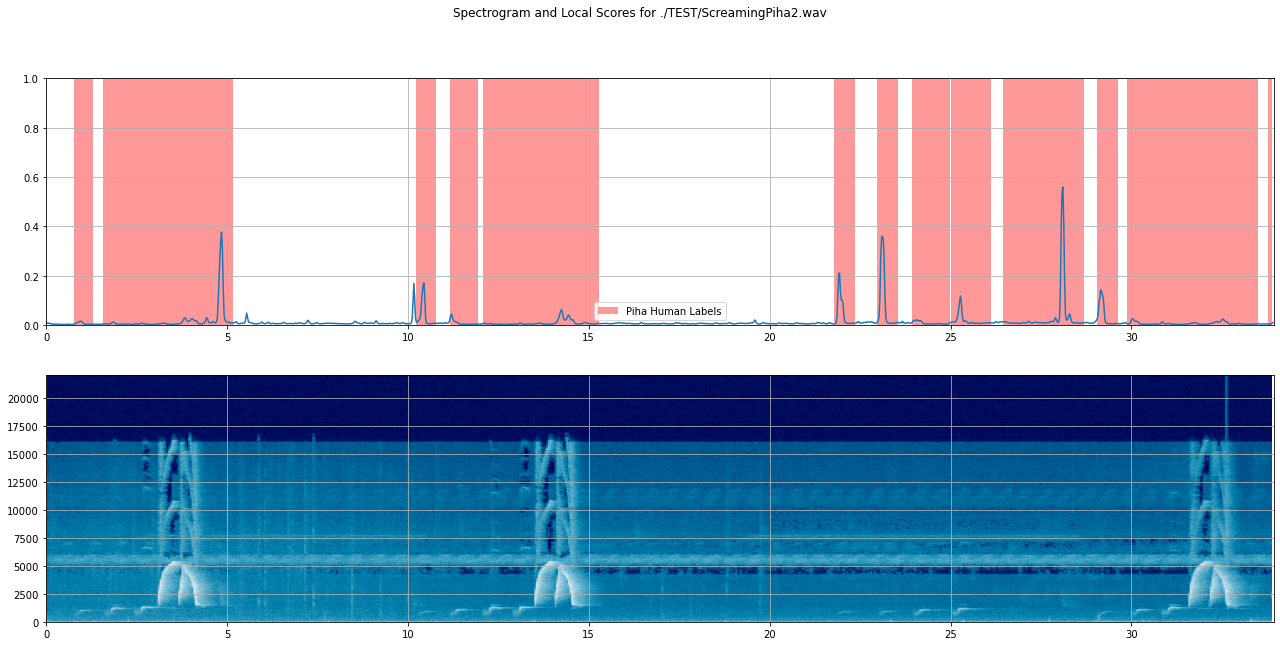

In [16]:
local_score_visualization(clip_path, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"],premade_annotations_label = "Piha Human Labels")

### Graph with Both Automated and Human Labels 
    Orange ==> True Positive
    Red ==> False Negative
    Yellow ==> False Positive
    White ==> True Negative

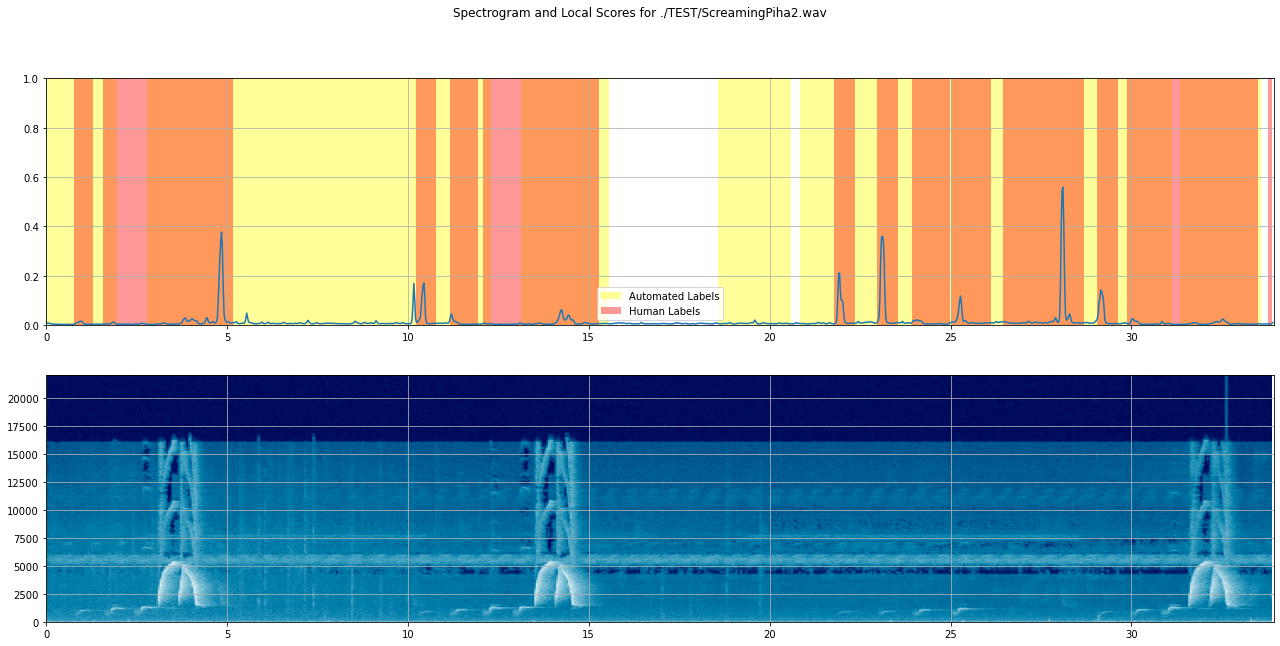

In [17]:
local_score_visualization(clip_path,automated_df = True,isolation_parameters=isolation_parameters,premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"])

### Another Visualization of True Positives, False Positives, False Negatives, and True Negatives 

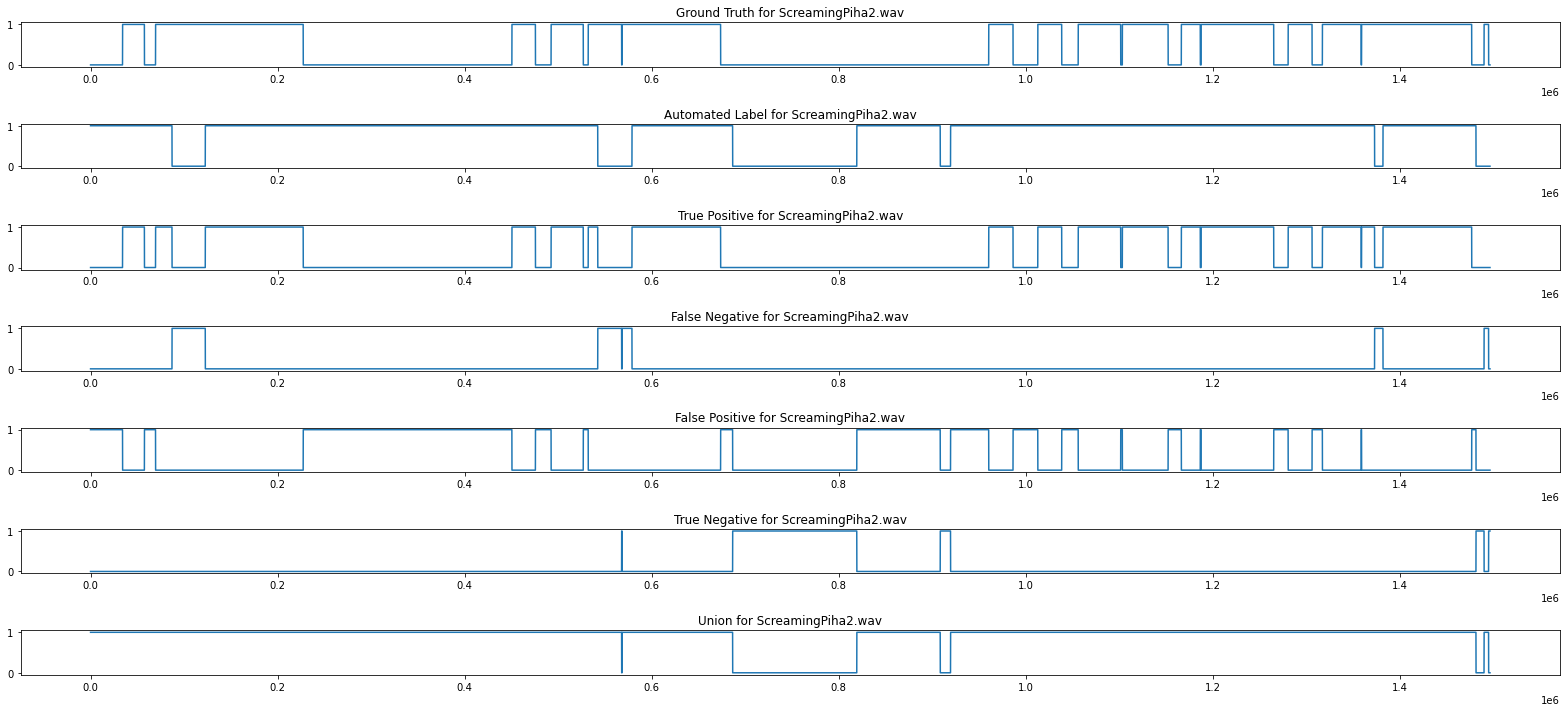

In [18]:
automated_piha_df = automated_df[automated_df["IN FILE"] == "ScreamingPiha2.wav"]
manual_piha_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"]
piha_stats = plot_bird_label_scores(automated_piha_df,manual_piha_df)

### Function that generates statistics to gauge efficacy of automated labeling compared to human labels 

In [19]:
statistics_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "general")
statistics_df

,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,./TEST/,ScreamingPiha1.wav,bird,8.606563,6.751313,5.681625,11.576500,21.039500,0.560401,0.602355,0.580621,0.409067
1,./TEST/,ScreamingPiha10.wav,bird,32.457098,46.491542,6.924195,3.910023,85.872834,0.411117,0.824176,0.548586,0.377967
2,./TEST/,ScreamingPiha11.wav,bird,31.577596,25.105533,6.239773,0.972608,62.922902,0.557090,0.835002,0.668305,0.501846
3,./TEST/,ScreamingPiha2.wav,bird,16.551043,11.939705,1.940680,3.501633,30.431429,0.580927,0.895051,0.704562,0.543880
4,./TEST/,ScreamingPiha3.wav,bird,4.455692,1.102721,0.000000,1.285669,5.558413,0.801612,1.000000,0.889883,0.801612
5,./TEST/,ScreamingPiha4.wav,bird,5.065125,3.801270,0.336440,4.354717,9.202834,0.571272,0.937714,0.710000,0.550387
6,./TEST/,ScreamingPiha5.wav,bird,31.081066,16.264036,4.217574,2.615283,51.562676,0.656479,0.880517,0.752170,0.602782
7,./TEST/,ScreamingPiha6.wav,bird,24.773515,37.876100,0.084853,7.900590,62.734467,0.395430,0.996587,0.566200,0.394895
8,./TEST/,ScreamingPiha7.wav,bird,49.733333,78.801837,1.896871,3.158163,130.432041,0.386924,0.963260,0.552085,0.381297
9,./TEST/,ScreamingPiha8.wav,bird,6.900091,36.233311,0.000000,0.987415,43.133401,0.159971,1.000000,0.275819,0.159971


### Function that takes the statistical ouput of all of the clips and gets the equivalent global scores 

In [20]:
global_dataset_statistics(statistics_df, stats_type = "general")

TypeError: global_dataset_statistics() got an unexpected keyword argument 'stats_type'

### Function that takes in the manual and automated labels for a clip and outputs human label-by-label IoU Scores. Used to derive statistics that measure how well a system is isolating desired segments of audio clips

In [ ]:
Intersection_over_Union_Matrix = clip_IoU(automated_piha_df,manual_piha_df)
print(Intersection_over_Union_Matrix)

### Function that turns the IoU Matrix of a clip into true positive and false positives values, as well as computing the precision, recall, and F1 statistics

In [ ]:
matrix_IoU_Scores(Intersection_over_Union_Matrix,manual_piha_df,0.5)

### Wrapper function that takes matrix_IoU_Scores across multiple clips. Allows user to modify the threshold that determines whether or not a label is a true positive.

In [ ]:
stats_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "IoU",threshold = 0.5)
stats_df

### Function that takes the output of dataset_IoU Statistics and ouputs a global count of true positives and false positives, as well as computing common metrics across the dataset

In [ ]:
global_stats_df = global_IoU_Statistics(stats_df)
global_stats_df